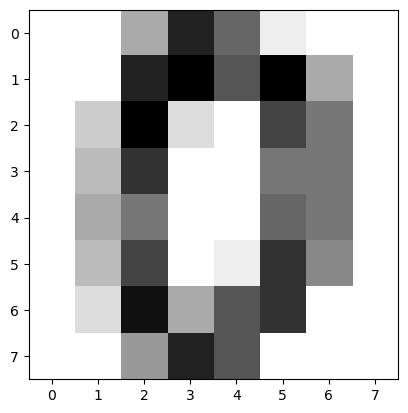

In [1]:

import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split


digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [2]:
data = digits.images
data.shape

(1797, 8, 8)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

X = data
y = digits.target

print(X.shape)

X = X.reshape(X.shape[0], 8, 8, 1) 

X /= 255                             

from keras.utils import to_categorical

nb_classes = 10

y = to_categorical(y, nb_classes)

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

print("Training matrix shape", X_train.shape)

print("Testing matrix shape", X_test.shape)




(1797, 8, 8)
Training matrix shape (1437, 8, 8, 1)
Testing matrix shape (360, 8, 8, 1)


In [4]:
print("X train :", X_train.shape)
print("y train :", y_train.shape)
print("X test :", X_test.shape)
print("y test :", y_test.shape)

X train : (1437, 8, 8, 1)
y train : (1437, 10)
X test : (360, 8, 8, 1)
y test : (360, 10)


In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                              input_shape=(8, 8, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())#2차원 데이터를 1차원으로 변경
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               51300     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                      

In [9]:
model_history=model.fit(x=X_train, y=y_train, epochs=50, batch_size=32,validation_data= (X_test,y_test))

Epoch 1/50
45/45 [==============================] - 1s 9ms/step - loss: 2.2840 - accuracy: 0.1768 - val_loss: 2.2557 - val_accuracy: 0.4056
Epoch 2/50
45/45 [==============================] - 0s 6ms/step - loss: 2.1906 - accuracy: 0.3786 - val_loss: 2.1124 - val_accuracy: 0.5028
Epoch 3/50
45/45 [==============================] - 0s 5ms/step - loss: 1.9598 - accuracy: 0.5129 - val_loss: 1.7723 - val_accuracy: 0.6972
Epoch 4/50
45/45 [==============================] - 0s 5ms/step - loss: 1.5913 - accuracy: 0.6284 - val_loss: 1.3536 - val_accuracy: 0.7722
Epoch 5/50
45/45 [==============================] - 0s 5ms/step - loss: 1.2107 - accuracy: 0.6987 - val_loss: 1.0079 - val_accuracy: 0.7694
Epoch 6/50
45/45 [==============================] - 0s 6ms/step - loss: 0.9841 - accuracy: 0.7307 - val_loss: 0.8041 - val_accuracy: 0.8000
Epoch 7/50
45/45 [==============================] - 0s 5ms/step - loss: 0.8352 - accuracy: 0.7662 - val_loss: 0.6622 - val_accuracy: 0.8444
Epoch 8/50
45/45 [==

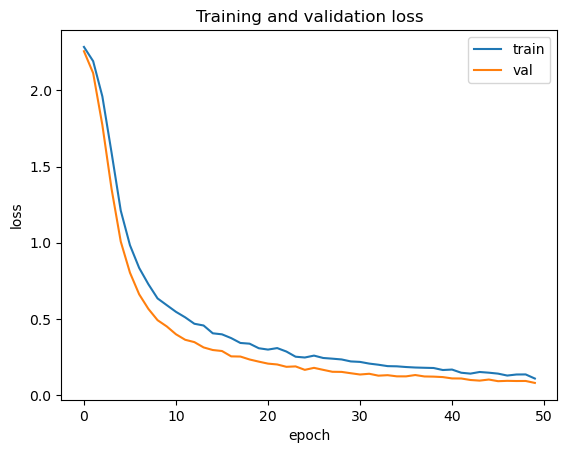

In [10]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.legend(['train','val'])
plt.show()